<a href="https://colab.research.google.com/github/Willy0211/Project-Analisis-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Willy
- **Email:** willyueu0211@gmail.com
- **ID Dicoding:** willysinon0211

## Menentukan Pertanyaan Bisnis

- Apakah ada pengaruh cuaca terhadap jumlah pengguna sepeda?
- Apakah terdepat perbedaan pola penggunaan sepeda pada hari kerja dibandingkan hari libur?

## Import Semua Packages/Library yang Digunakan

In [21]:
#Meng-import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
!unzip /content/Bike-sharing-dataset.zip

Archive:  /content/Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [6]:
#Memasukkan/membaca data hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#Memasukkan/membaca data day.csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [8]:
#Melihat data dari hour_df, apakah ada data yang anomali.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#Melihat data dari day_df, apakah ada data yang anomali.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

Cleaning Data hour_df

In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah Data yang Terduplikasi: ", hour_df.duplicated().sum())

Jumlah Data yang Terduplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cleaning Data day_df

In [14]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [15]:
print("Jumlah Data yang Terduplikasi: ", day_df.duplicated().sum())

Jumlah Data yang Terduplikasi:  0


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Exploratory Data Analysis (EDA)

### Explore Tabel hour_df

In [17]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2240,2241,2011-04-08,2,0,4,5,0,5,1,2,0.32,0.3182,0.87,0.1940,1,8,9
12796,12797,2012-06-22,3,1,6,9,0,5,1,1,0.76,0.7121,0.58,0.2239,55,278,333
13519,13520,2012-07-22,3,1,7,12,0,0,0,2,0.70,0.6515,0.70,0.1045,178,326,504
2880,2881,2011-05-04,2,0,5,22,0,3,1,1,0.38,0.3939,0.62,0.2239,9,80,89
11126,11127,2012-04-13,2,1,4,19,0,5,1,1,0.54,0.5152,0.24,0.1642,75,352,427
12860,12861,2012-06-25,3,1,6,1,0,1,1,1,0.70,0.6515,0.65,0.2239,11,20,31
4606,4607,2011-07-15,3,0,7,20,0,5,1,1,0.70,0.6515,0.51,0.2239,92,251,343
3222,3223,2011-05-19,2,0,5,4,0,4,1,1,0.48,0.4697,0.94,0.0000,2,3,5
11855,11856,2012-05-14,2,1,5,4,0,1,1,2,0.54,0.5152,0.77,0.2239,3,3,6
14435,14436,2012-08-29,3,1,8,16,0,3,1,1,0.76,0.6667,0.37,0.1343,104,389,493


In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


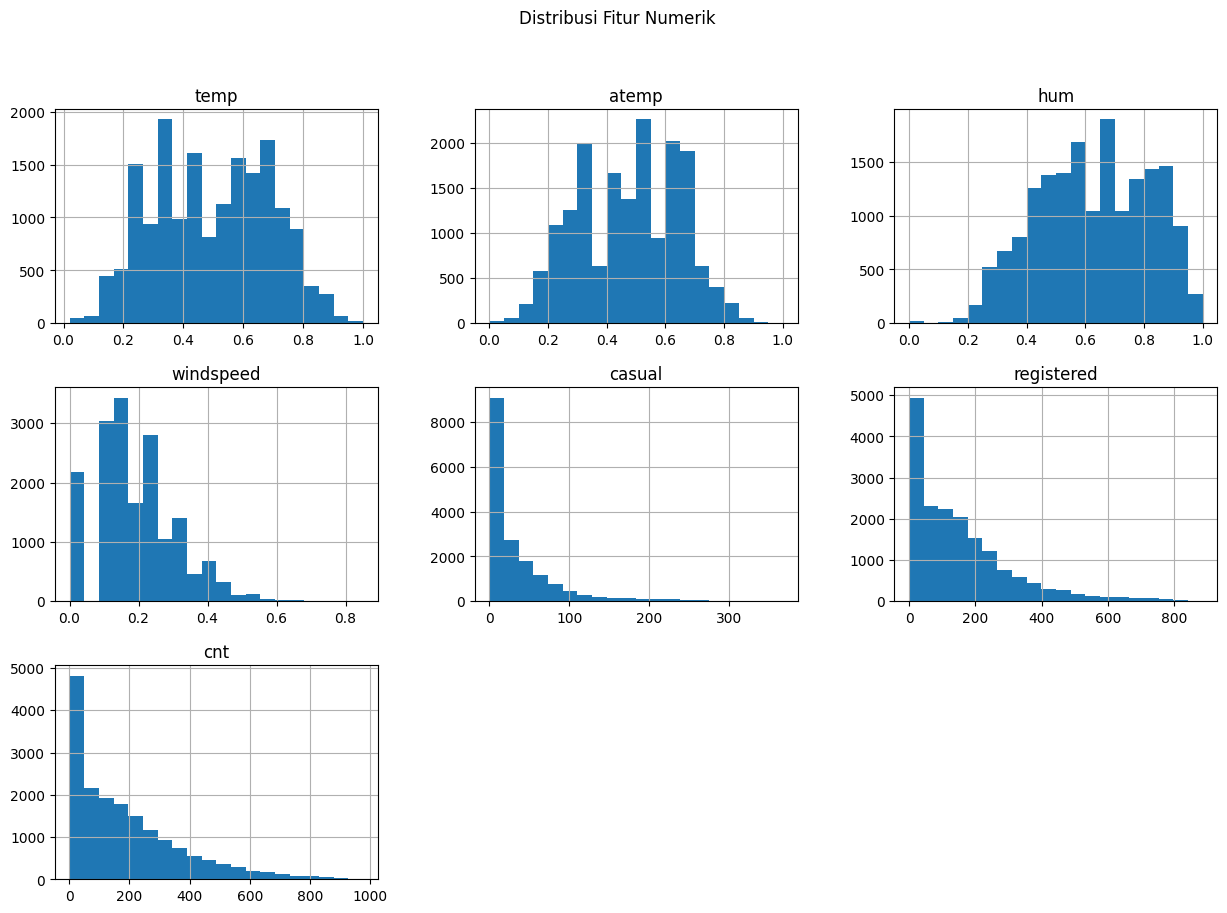

In [19]:
# Menganalisa Distribusi Data Numerika Menggunakan Histogram
# Menentukan kolom-kolom yang berisi fitur numerik untuk dianalisis
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Membuat histogram untuk setiap kolom numerik yang terpilih
hour_df[numerical_columns].hist(bins=20, figsize=(15, 10))

# Menambahkan judul keseluruhan untuk visualisasi histogram
plt.suptitle('Distribusi Fitur Numerik')

# Menampilkan semua histogram dalam satu plot
plt.show()

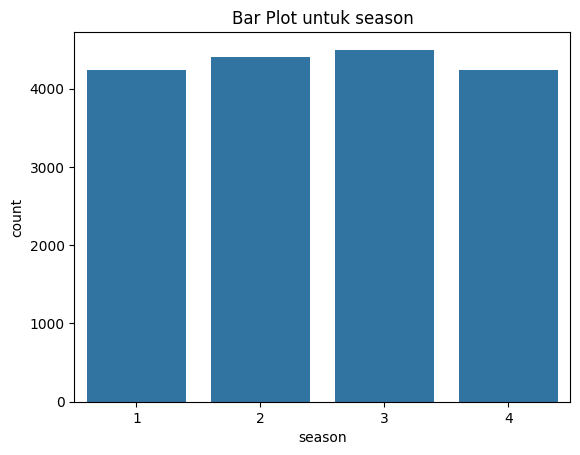

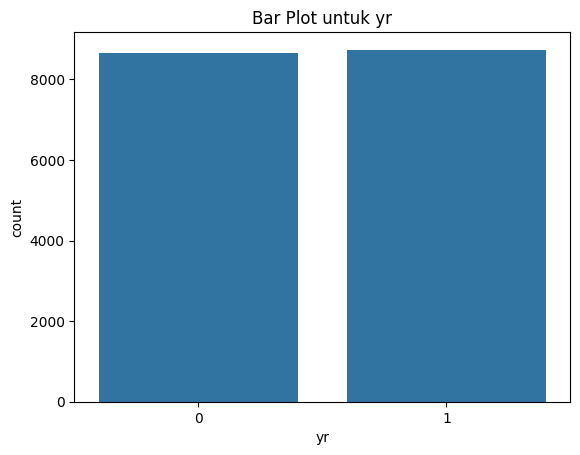

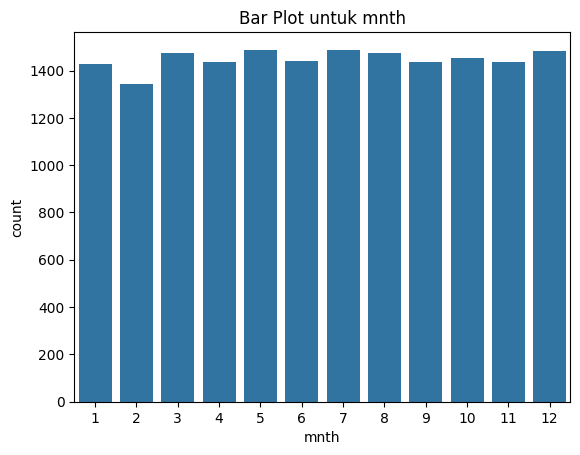

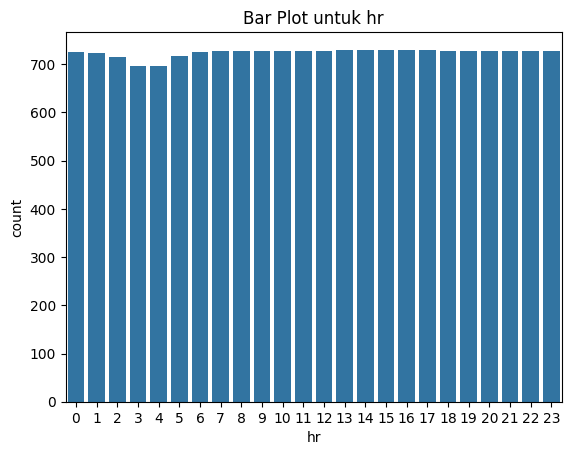

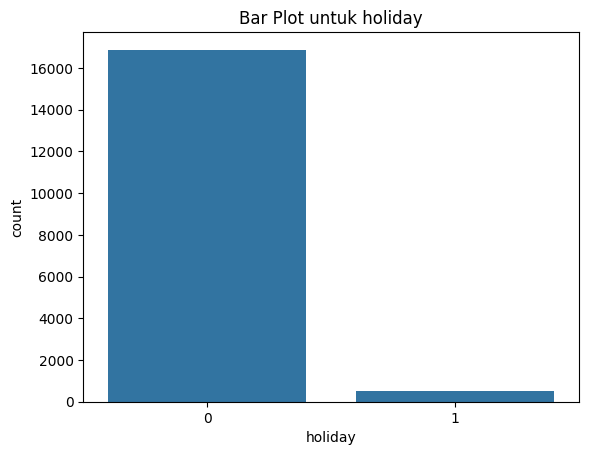

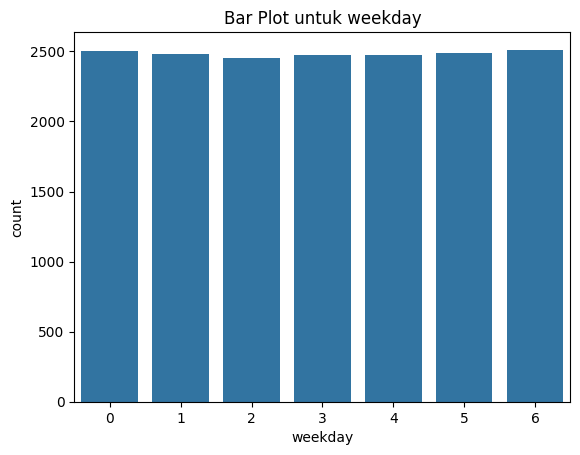

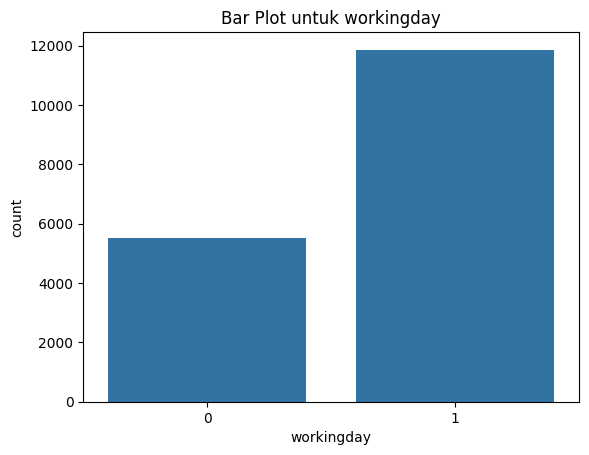

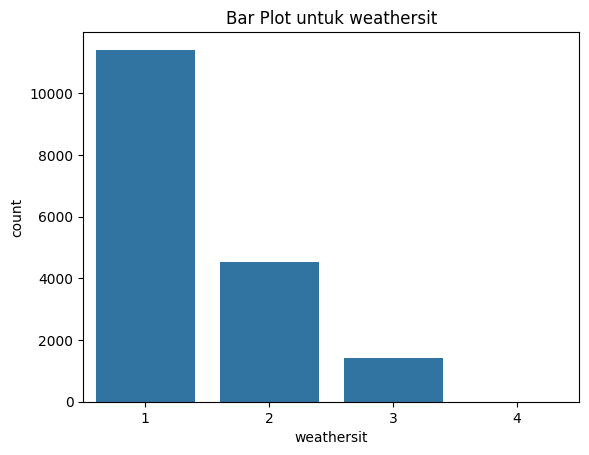

In [22]:
#Menganalisa Variabel Kategorial dengan Bar Plot

# Menentukan kolom-kolom yang berisi fitur kategorikal untuk dianalisis
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Membuat bar plot untuk setiap fitur kategorikal
for column in categorical_columns:
    sns.countplot(x=column, data=hour_df)  # Membuat count plot untuk kolom kategorikal
    plt.title(f'Bar Plot untuk {column}')  # Menambahkan judul pada setiap plot
    plt.show()  # Menampilkan plot

In [26]:
# Menghapus Kolom 'dteday' Sebelum Menghitung Korelasi
hour_df_numeric = hour_df.drop(columns=['dteday'])

In [29]:
# Menghitung Korelasi
correlation = hour_df_numeric.corr()

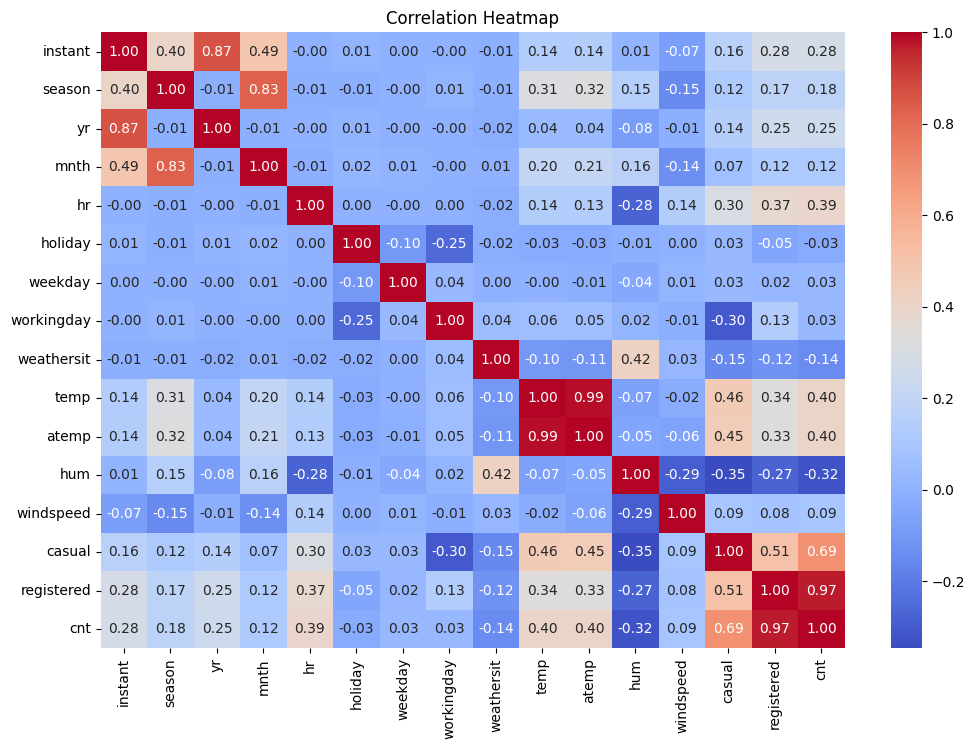

In [30]:
# Menampilkan heatmap korelasi khusus untuk 'weathersit' dan 'cnt'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

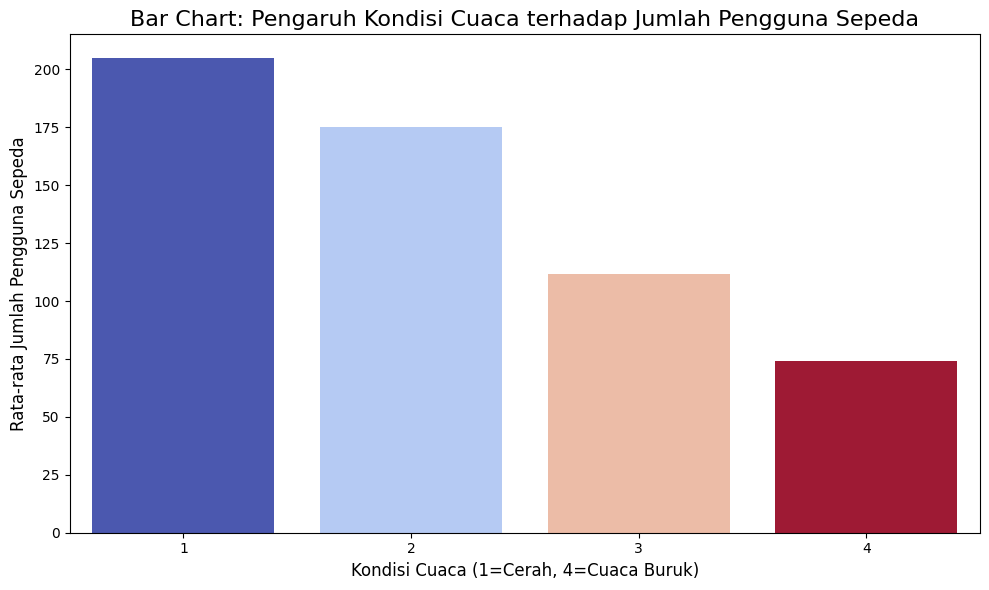

In [52]:
# Membuat bar chart untuk melihat pengaruh kondisi cuaca terhadap jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm', errorbar=None, dodge=False, legend=False)
plt.title('Bar Chart: Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca (1=Cerah, 4=Cuaca Buruk)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda', fontsize=12)
plt.tight_layout()
plt.show()

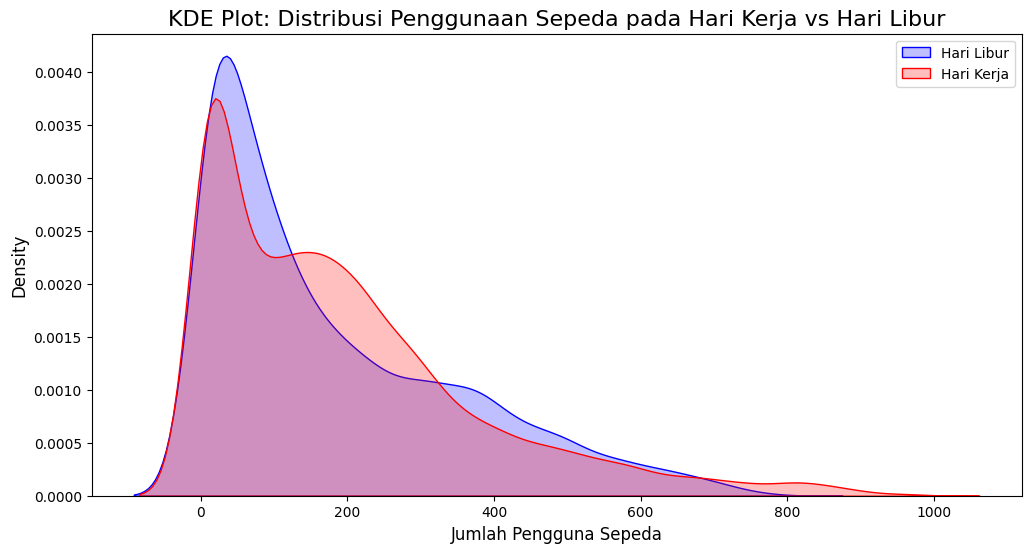

In [49]:
# Membuat KDE plot untuk membandingkan penggunaan sepeda pada hari kerja vs hari libur
plt.figure(figsize=(12, 6))
sns.kdeplot(data=hour_df[hour_df['workingday'] == 0]['cnt'], label='Hari Libur', fill=True, color='blue')
sns.kdeplot(data=hour_df[hour_df['workingday'] == 1]['cnt'], label='Hari Kerja', fill=True, color='red')
plt.title('KDE Plot: Distribusi Penggunaan Sepeda pada Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

### Explore Tabel day_df

In [53]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
709,710,2012-12-10,4,1,12,0,1,1,2,0.435833,0.435575,0.925000,0.190308,329,4841,5170
469,470,2012-04-14,2,1,4,0,6,0,1,0.495000,0.487996,0.502917,0.190917,2795,4665,7460
587,588,2012-08-10,3,1,8,0,5,1,2,0.715833,0.667942,0.715833,0.238813,1065,4721,5786
218,219,2011-08-07,3,0,8,0,0,0,1,0.742500,0.715292,0.752917,0.201487,1298,2487,3785
502,503,2012-05-17,2,1,5,0,4,1,1,0.593333,0.572613,0.520000,0.229475,1242,6142,7384
238,239,2011-08-27,3,0,8,0,6,0,2,0.680000,0.635556,0.850000,0.375617,226,889,1115
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
59,60,2011-03-01,1,0,3,0,2,1,1,0.266667,0.263879,0.535000,0.216425,137,1714,1851
320,321,2011-11-17,4,0,11,0,4,1,2,0.341667,0.323221,0.575833,0.305362,139,2914,3053
682,683,2012-11-13,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094


In [54]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


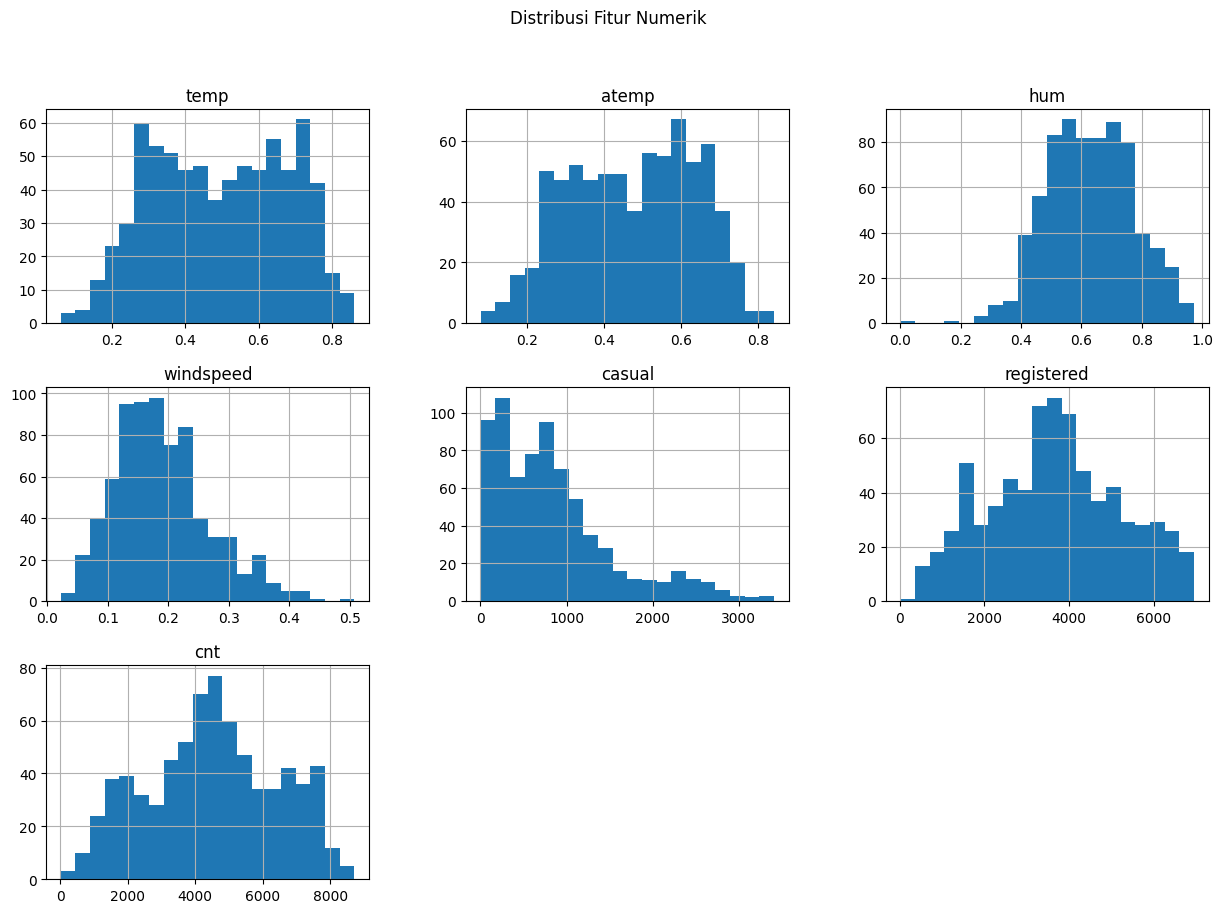

In [56]:
# Menganalisa Distribusi Data Numerika Menggunakan Histogram
# Menentukan kolom-kolom yang berisi fitur numerik untuk dianalisis
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Membuat histogram untuk setiap kolom numerik yang terpilih
day_df[numerical_columns].hist(bins=20, figsize=(15, 10))

# Menambahkan judul keseluruhan untuk visualisasi histogram
plt.suptitle('Distribusi Fitur Numerik')

# Menampilkan semua histogram dalam satu plot
plt.show()

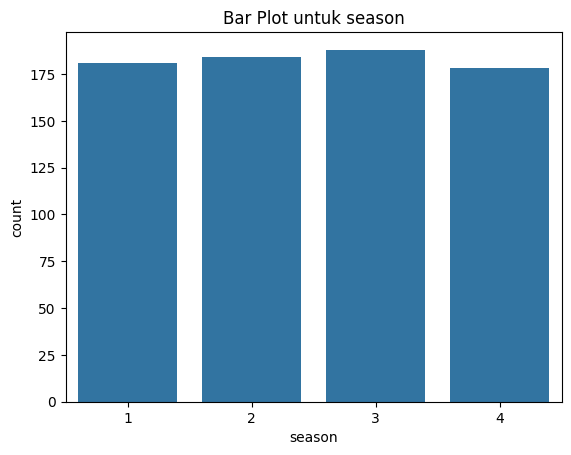

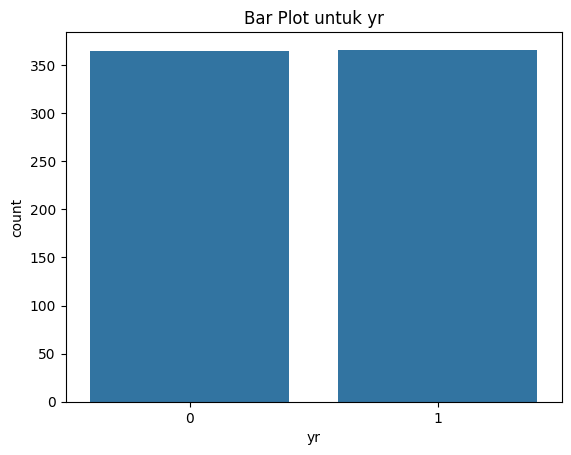

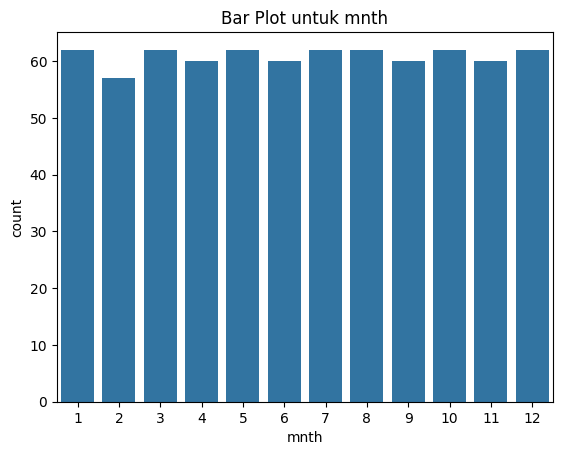

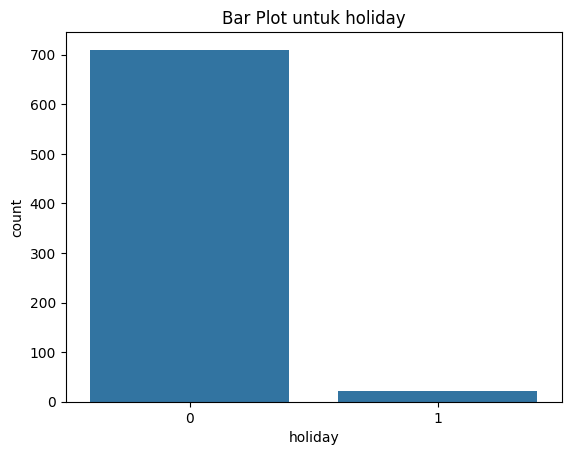

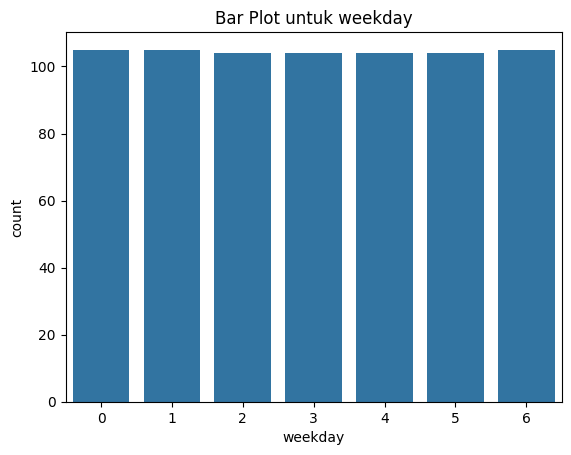

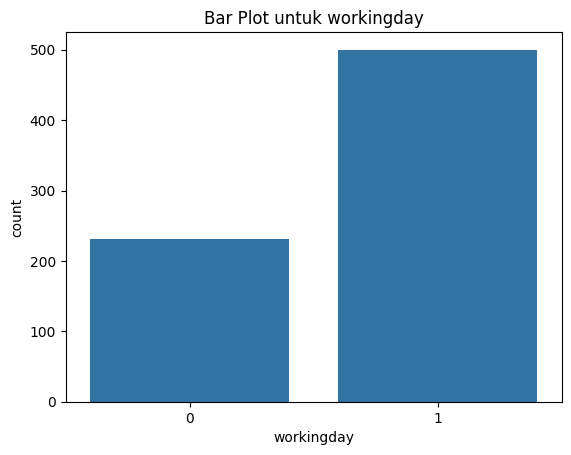

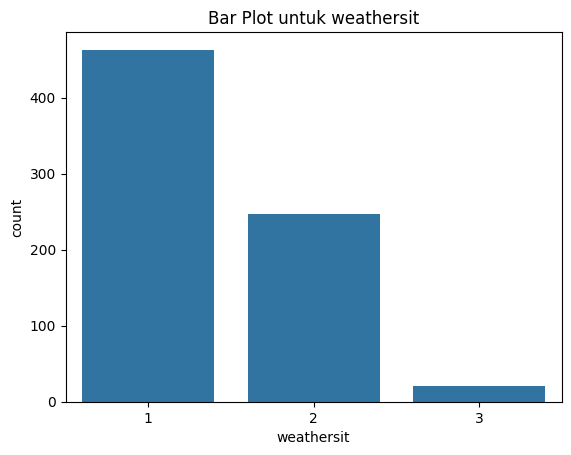

In [59]:
#Menganalisa Variabel Kategorial dengan Bar Plot

# Menentukan kolom-kolom yang berisi fitur kategorikal untuk dianalisis
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Membuat bar plot untuk setiap fitur kategorikal
for column in categorical_columns:
    sns.countplot(x=column, data=day_df)  # Membuat count plot untuk kolom kategorikal
    plt.title(f'Bar Plot untuk {column}')  # Menambahkan judul pada setiap plot
    plt.show()  # Menampilkan plot

In [60]:
# Menghapus Kolom 'dteday' Sebelum Menghitung Korelasi
day_df_numeric = day_df.drop(columns=['dteday'])

In [61]:
# Menghitung Korelasi
correlation = day_df_numeric.corr()

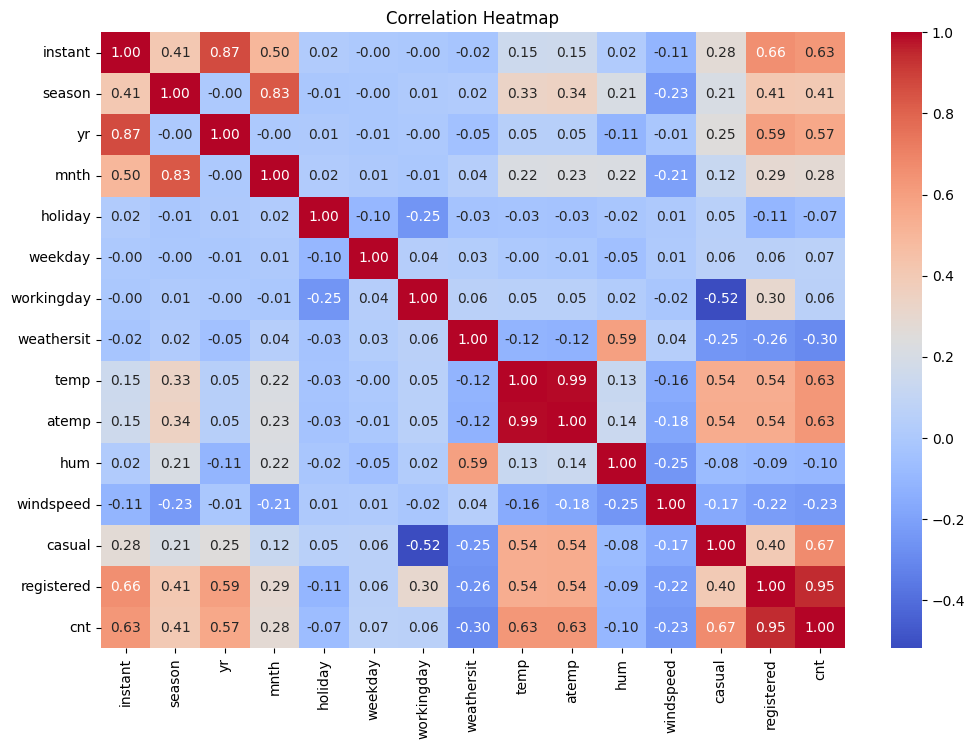

In [62]:
# Menampilkan heatmap korelasi khusus untuk 'weathersit' dan 'cnt'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


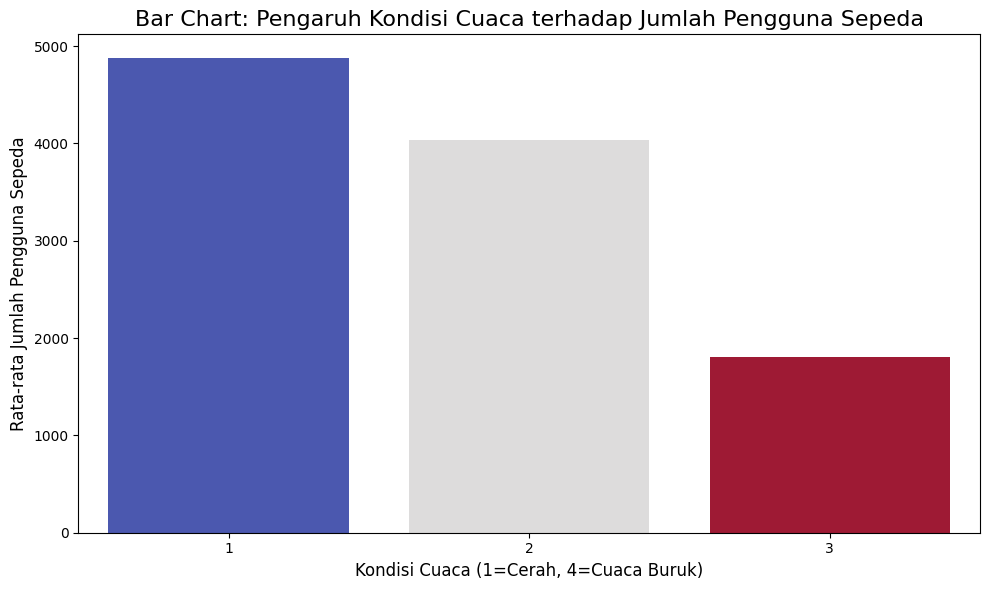

In [65]:
# Membuat bar chart untuk melihat pengaruh kondisi cuaca terhadap jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df, hue='weathersit', palette='coolwarm', errorbar=None, dodge=False, legend=False)
plt.title('Bar Chart: Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca (1=Cerah, 4=Cuaca Buruk)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda', fontsize=12)
plt.tight_layout()
plt.show()

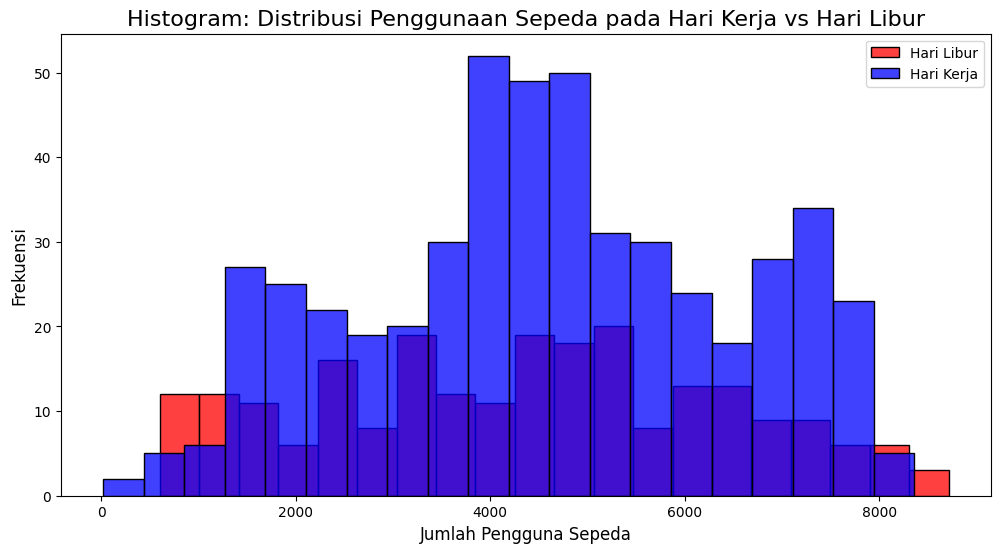

In [74]:
# Membuat histogram untuk hari kerja vs hari libur
plt.figure(figsize=(12, 6))
sns.histplot(day_df[day_df['workingday'] == 0]['cnt'], label='Hari Libur', color='red', bins=20, kde=False)
sns.histplot(day_df[day_df['workingday'] == 1]['cnt'], label='Hari Kerja', color='blue', bins=20, kde=False)
plt.title('Histogram: Distribusi Penggunaan Sepeda pada Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.show()

### Explore All Data (day_df & hour_df)

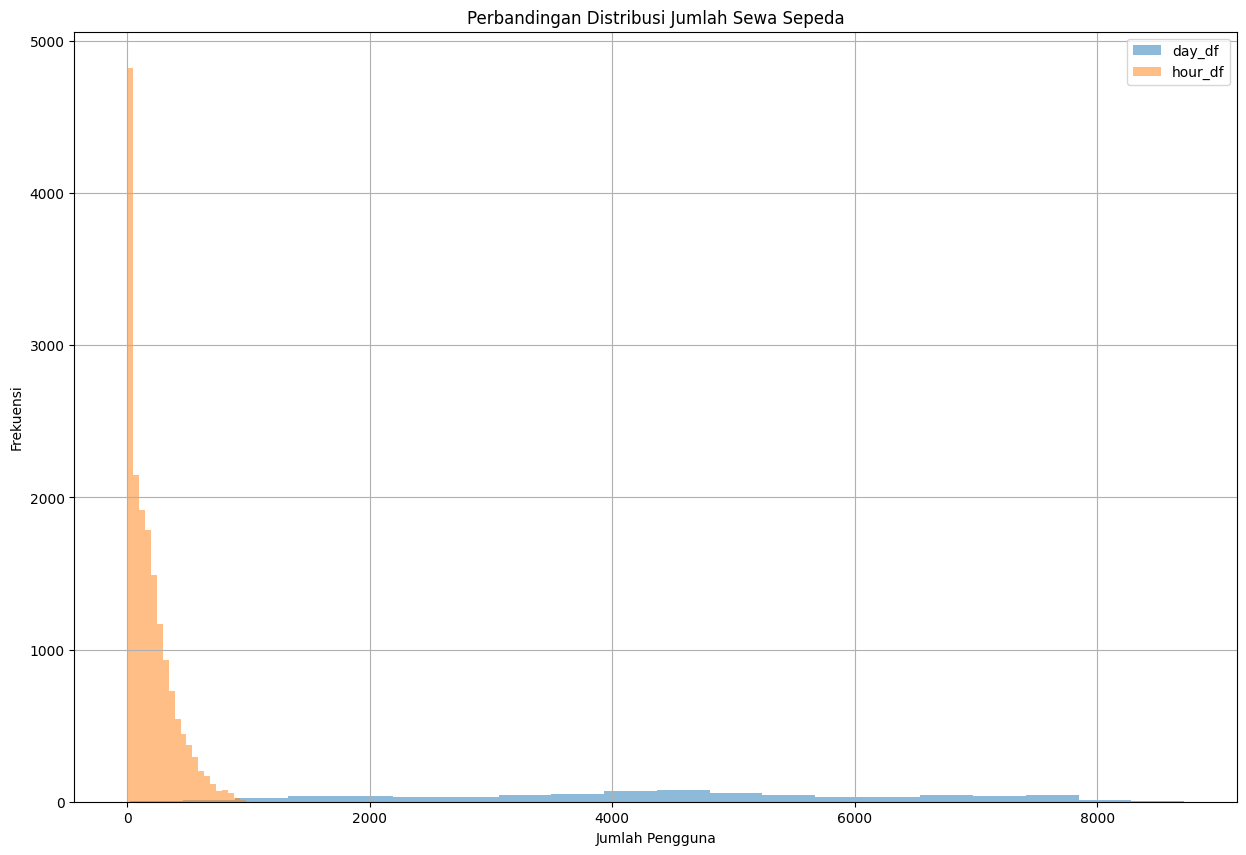

In [75]:
# Membandingkan distribusi jumlah sewa sepeda antara day_df dan hour_df
plt.figure(figsize=(15, 10))
day_df['cnt'].hist(alpha=0.5, label='day_df', bins=20)
hour_df['cnt'].hist(alpha=0.5, label='hour_df', bins=20)
plt.title('Perbandingan Distribusi Jumlah Sewa Sepeda')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [76]:
# Menganalisis Korelasi Antara Variabel Yang Sama Dari Kedua Tabel

correlation_day = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
correlation_hour = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

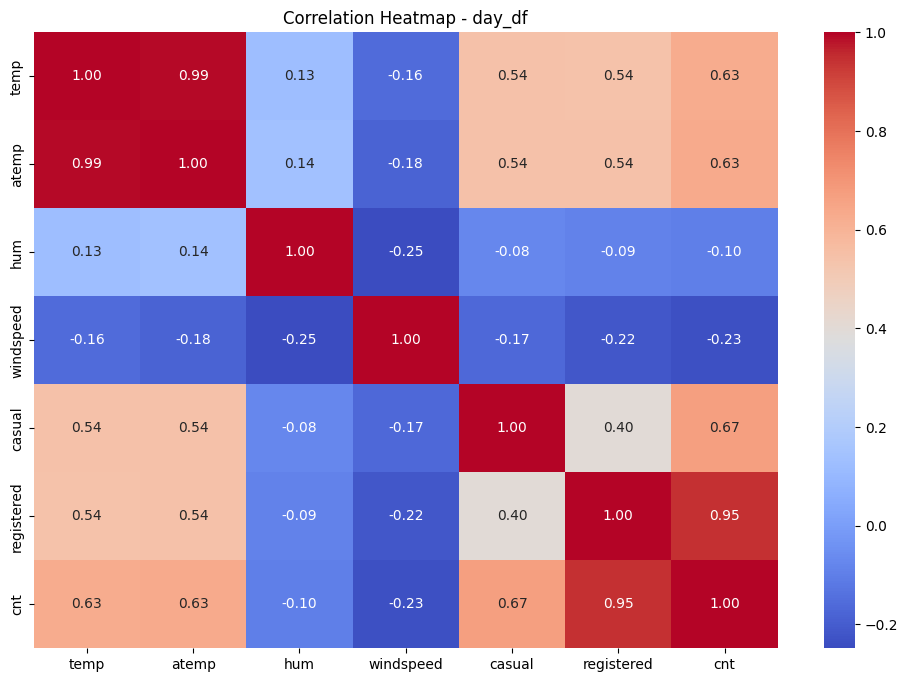

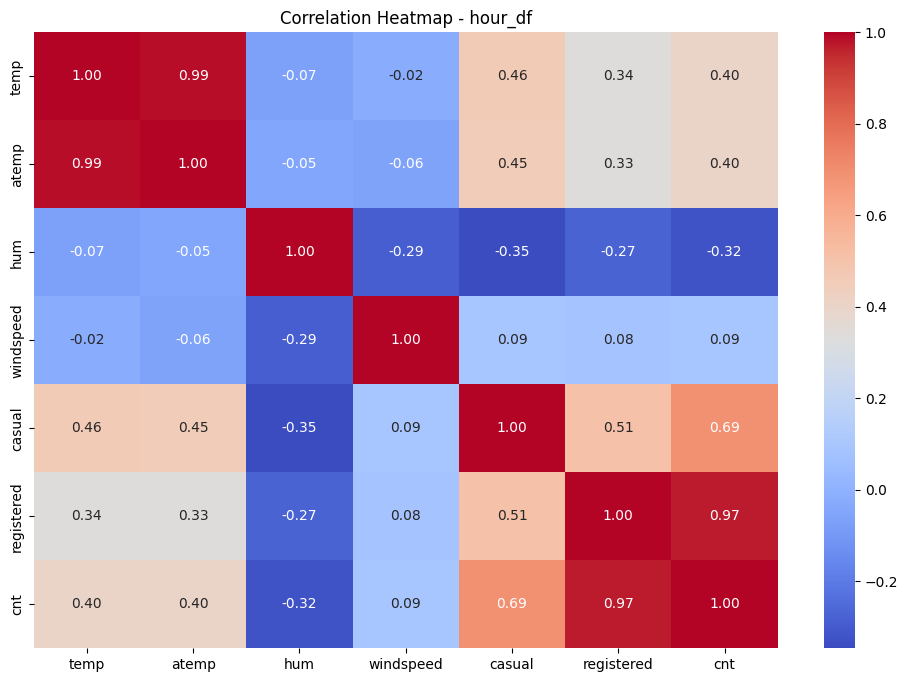

In [77]:
# Visualisasi Heatmap Korelasi

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - day_df')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - hour_df')
plt.show()

In [78]:
## Menggabungkan day_df dan hour_df Berdasarkan Kolom 'dteday'

all_df = pd.merge(left=day_df, right=hour_df, how="inner", on="dteday")

In [79]:
# Menyimpan Gabungan Data Menjadi File CSV

all_df.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

In [80]:
all_df.sample(10)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
297,13,2011-01-13,1,0,1,0,4,1,1,0.165000,...,4,1,1,0.16,0.1515,0.47,0.2239,0,64,64
3139,135,2011-05-15,2,0,5,0,0,0,2,0.562500,...,0,0,3,0.56,0.5303,0.78,0.3582,137,255,392
3294,142,2011-05-22,2,0,5,0,0,0,1,0.604167,...,0,0,1,0.50,0.4848,1.00,0.0000,3,9,12
12050,508,2012-05-22,2,1,5,0,2,1,2,0.615000,...,2,1,3,0.56,0.5303,0.88,0.1045,9,315,324
15611,656,2012-10-17,4,1,10,0,3,1,1,0.455833,...,3,1,1,0.56,0.5303,0.52,0.1940,70,396,466
12031,507,2012-05-21,2,1,5,0,1,1,2,0.598333,...,1,1,2,0.60,0.5606,0.83,0.2537,46,124,170
9212,389,2012-01-24,1,1,1,0,2,1,1,0.342500,...,2,1,1,0.40,0.4091,0.62,0.0896,32,391,423
628,29,2011-01-29,1,0,1,0,6,0,1,0.196522,...,6,0,2,0.18,0.1970,0.64,0.1343,4,60,64
9587,405,2012-02-09,1,1,2,0,4,1,1,0.265000,...,4,1,1,0.22,0.2121,0.51,0.2239,7,90,97
15034,632,2012-09-23,4,1,9,0,0,0,1,0.529167,...,0,0,1,0.60,0.6212,0.33,0.2239,265,375,640


### Pertanyaan 1: Apakah ada pengaruh cuaca terhadap jumlah pengguna sepeda?

In [81]:
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [86]:
weather_data = all_df.groupby('weathersit_y')['cnt_y'].sum().reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

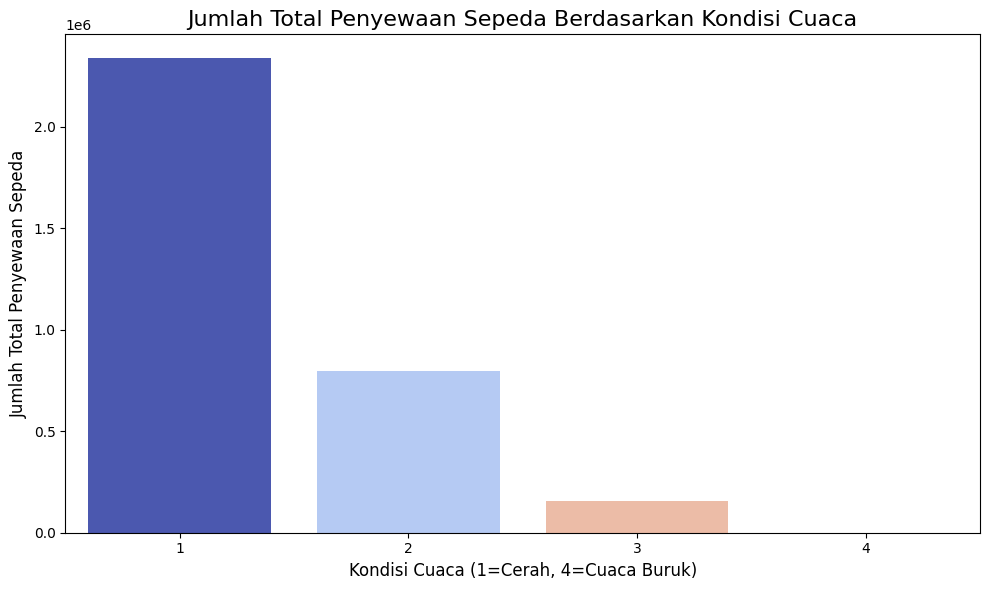

In [88]:
# Membuat bar chart untuk pengaruh kondisi cuaca terhadap jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_y', y='cnt_y', data=weather_data, hue='weathersit_y', palette='coolwarm', dodge=False, legend=False)
plt.title('Jumlah Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca (1=Cerah, 4=Cuaca Buruk)', fontsize=12)
plt.ylabel('Jumlah Total Penyewaan Sepeda', fontsize=12)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah terdepat perbedaan pola penggunaan sepeda pada hari kerja dibandingkan hari libur?

In [89]:
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [92]:
# Mengelompokkan data berdasarkan hari kerja
workingday_data = all_df.groupby('workingday_y')['cnt_y'].mean().reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


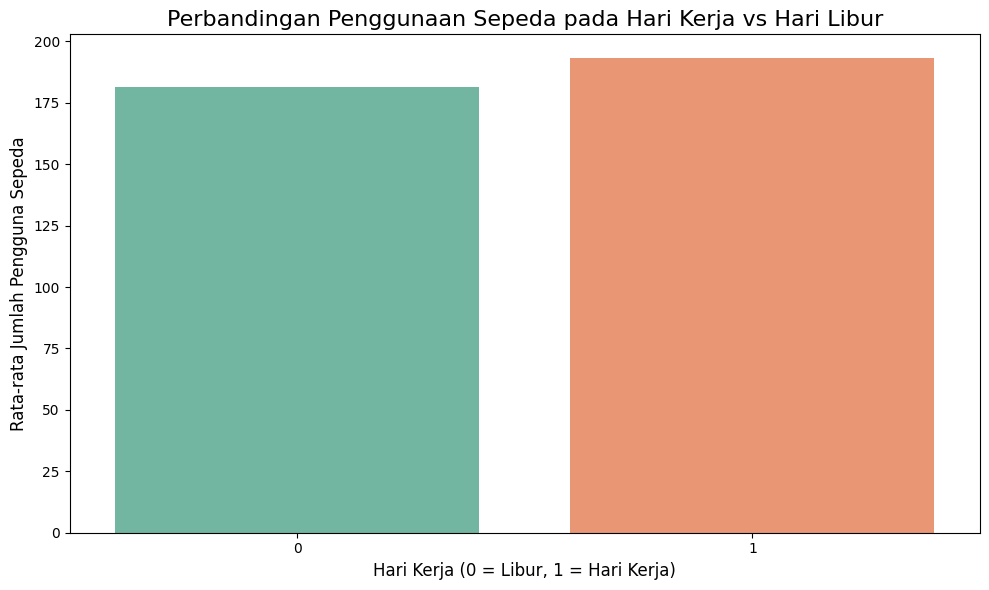

In [94]:
# Membuat bar chart untuk melihat perbedaan penggunaan sepeda pada hari kerja dan hari libur
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday_y', y='cnt_y', data=workingday_data, hue='workingday_y', palette='Set2', dodge=False, legend=False)
plt.title('Perbandingan Penggunaan Sepeda pada Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Hari Kerja (0 = Libur, 1 = Hari Kerja)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda', fontsize=12)
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

## Apakah ada pengaruh cuaca terhadap jumlah pengguna sepeda?
1.   Cuaca cerah (kategori 1) memiliki jumlah pengguna sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca yang lebih buruk, seperti hujan ringan atau mendung (kategori 2) dan hujan lebat atau salju (kategori 3 dan 4).
2.   Ini menunjukkan bahwa cuaca yang lebih baik (cerah dan tidak berawan) mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, cuaca buruk mengurangi jumlah pengguna sepeda, karena orang cenderung menghindari penggunaan sepeda saat cuaca kurang mendukung.

## Apakah terdepat perbedaan pola penggunaan sepeda pada hari kerja dibandingkan hari libur?
1.   Hari kerja (kategori 1) cenderung memiliki jumlah pengguna sepeda yang lebih tinggi dibandingkan dengan hari libur (kategori 0). Ini mungkin disebabkan oleh penggunaan sepeda sebagai sarana transportasi untuk bekerja atau kegiatan rutin lainnya pada hari kerja.
2.   Pada hari libur, jumlah pengguna sepeda sedikit lebih rendah, yang mungkin mengindikasikan bahwa sepeda lebih sedikit digunakan untuk aktivitas rekreasi atau tujuan non-rutin.

